In [115]:
#-*- coding:utf8-*-
%matplotlib inline

from __future__ import absolute_import, division, print_function, unicode_literals

from IPython.display import Image

import numpy as np

import uncertainties as unc
from uncertainties import unumpy as unp
from uncertainties.unumpy import std_devs as stds #TODO
from uncertainties.unumpy import nominal_values as noms #TODO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 

import seaborn as sns
sns.set(context="paper",font_scale=1.4)
sns.set_context(rc={'lines.markeredgewidth': 0.1})

import scipy as sp
import scipy.constants as const

import sympy as sym

import pandas as pd


from aputils.latextables.tables import Table

import sys

# Fehlerfortpflanzung beim Mitteln
umean = unc.wrap(np.mean)

#Laden des Latex fonts 
plt.rcParams['text.latex.preamble']=["\\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

#Größe der Achsenbeschriftung
axis_font = {'size':'14'}

# Pfade
path_graphics = "../Grafiken/"
path_table = "../Tabellen/"
path_data = "../Messdaten/"

/home/luckyjosh/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [123]:
# Funktionen
# Achsenbeschriftungen
def axis_label(label,sym=None,unit=None):
    if sym == None:
        return lable
    elif unit == None:
        return r"".join([label," ${s}$".format(s=sym)])
    else:
        return r"".join([label," ${s}/\mathrm{{{u}}}$".format(s=sym,u=unit)])

# Achsenskalierung
def axis_scale(factor, axis="x"):
    if axis == "x":
        plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: x * factor))
    elif axis == "y":
        plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: x * factor))
    else:
        print("Wrong axis name given! Only x and y are allowed!")

def siunitx_ticklabels(ax=None, locale="DE", xaxis=True, yaxis=True,
                       round_precision=2, round_mode="places", scale_x=None, scale_y=None):
    """
    This function uses siunitx to create the ticklabels
    Main reason is for adjusting the decimal marker properly.
    The function takes 4 arguments:
        ax=None     the matplotlib axes to operate on
                    if set to None (Standard) this will be the current axes
        locale="DE" The locale parameter for siunitx, one of
                    "UK", "US", "DE", "FR" oder "ZA"
        xaxis=True  Boolean, if True the labels for the xaxis are set
        yaxis=True  Boolean, if True the labels for the yaxis are set
        round_precision=2 Number of places or figures after rounding
        round_mode="places" Rounds to round_precision many decimal places,
                  "figures" Rounds to round_precision many significant figures
                  
    """

    if ax is None:
        ax = plt.gca()

    if scale_x == None:
        scale_x = 1
    if scale_y == None:
        scale_y = 1
        
        
    if xaxis is True:
        xticks = ax.get_xticks()
        print(xticks)
        xlabels = [r"$\num[locale={},round-mode={},round-precision={}]{{{}}}$".format(
                   locale, round_mode,round_precision, tick*scale_x) for tick in xticks]
        #print(xlabels)
        ax.set_xticklabels(xlabels)

    if yaxis is True:
        yticks = ax.get_yticks()
        ylabels = [r"$\num[locale={},round-mode={},round-precision={}]{{{}}}$".format(
                   locale, round_mode,round_precision, tick*scale_y) for tick in yticks]
        #print(ylabels)
        ax.set_yticklabels(ylabels)    
        
# Fit Funktionen
def fit_errors(popt,pcov):
    errors = np.sqrt(np.diag(pcov))
    param_err = unp.uarray(popt,errors)
    return param_err
    
def print_errors(array,description=None):
    if description and len(description)==len(array):
        maxlen = max(map(len,description))
        lens = map(len,description)
        for entry,Len,desc in zip(array,lens,description):
            #print(desc," "*(maxlen-Len),entry.nominal_value,"+/-",entry.std_dev)
            print(desc," "*(maxlen-Len),"{:.1uS}".format(entry))
    else:
        for i,entry in enumerate(array):
            print(entry.nominal_value,"+/-",entry.std_dev)
    print("")
    
def print_result(result,sym,unit=None,file=sys.stdout):
    if unit == None:
        print("{} = ".format(sym),"\\num{{{:.1uS}}}".format(result),file=file)
    else:
        print("{} = ".format(sym),"\\SI{{{:.1uS}}}{{{}}}".format(result,unit),file=file)

In [ ]:
print()

In [100]:
def lighten_color(color_rgb, amount):
    def calc_new(value,amount):
        new_value = value + amount
        if new_value >1:
            new_value = 1
        elif new_value < 0:
            new_value = 0
        return new_value
    
    new_color = tuple([calc_new(val,amount) for val in color_rgb])
    return new_color
        
    

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.6980392156862745), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


/home/luckyjosh/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


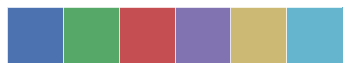

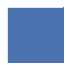

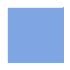

In [106]:
print(sns.color_palette())
sns.palplot(sns.color_palette())
sns.palplot([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)])
sns.palplot([lighten_color((0.2980392156862745, 0.4470588235294118, 0.6901960784313725),0.2)])

## Auswertung Resonanzstellen

In [3]:
def magnetic_field_coil(N,R,I):
    return const.mu_0 * (8*I*N/(np.sqrt(125)*R))

In [28]:
# Spulenparameter N:Windungszahl, R:Radius
coil_sweep = {"N":11, "R":0.1639}
coil_horizontal = {"N":154,"R":0.1579}
coil_verttical = {"N":20,"R":0.11735}

magnetic_field_frequence_factor = 4*np.pi*(const.electron_mass/const.e)

In [5]:
# Resonanzstellen für die beiden Isotope
resonance_positions = pd.read_csv(path_data+"Resonanzsstellen.csv")

In [7]:
resonance_positions.head(5)

,Frequenz kHz,SweepStrom P1 0.1V,HorizontalStrom P1 0.3V,SweepStrom P2 0.1V,HorizontalStrom P2 0.3V
0,100,5.61,0.00,6.80,0.00
1,200,5.79,0.05,8.14,0.05
2,300,2.81,0.17,6.39,0.17
3,400,1.74,0.25,6.49,0.25
4,500,1.99,0.30,7.87,0.30


In [31]:
# GesamtHorizontalFeld an den Resonanzstellen beider Isotope
resonance_positions["Magnetfeld P1"] = (magnetic_field_coil(coil_sweep["N"],coil_sweep["R"],0.1 * resonance_positions["SweepStrom P1 0.1V"]) + 
                                         magnetic_field_coil(coil_horizontal["N"],coil_horizontal["R"],0.3 * resonance_positions["HorizontalStrom P1 0.3V"]))
resonance_positions["Magnetfeld P2"] = (magnetic_field_coil(coil_sweep["N"],coil_sweep["R"],0.1 * resonance_positions["SweepStrom P2 0.1V"]) + 
                                         magnetic_field_coil(coil_horizontal["N"],coil_horizontal["R"],0.3 * resonance_positions["HorizontalStrom P2 0.3V"]))

In [32]:
resonance_positions.head(5)

,Frequenz kHz,SweepStrom P1 0.1V,HorizontalStrom P1 0.3V,SweepStrom P2 0.1V,HorizontalStrom P2 0.3V,Magnetfeld P1,Magnetfeld P2
0,100,5.61,0.00,6.80,0.00,0.000034,0.000041
1,200,5.79,0.05,8.14,0.05,0.000048,0.000062
2,300,2.81,0.17,6.39,0.17,0.000062,0.000083
3,400,1.74,0.25,6.49,0.25,0.000076,0.000105
4,500,1.99,0.30,7.87,0.30,0.000091,0.000126


In [45]:
#Fit der Messwerte
linear_fct = lambda x,a,b: a*x + b 

popt, pcov = sp.optimize.curve_fit(linear_fct,resonance_positions["Frequenz kHz"],resonance_positions["Magnetfeld P1"])
fit_parameter_P1 = fit_errors(popt,pcov)

popt, pcov = sp.optimize.curve_fit(linear_fct,resonance_positions["Frequenz kHz"],resonance_positions["Magnetfeld P2"])
fit_parameter_P2 = fit_errors(popt,pcov)


In [126]:
print("Fit Parameter P1")
print_errors(fit_parameter_P1,description=("a","b"))

print("Fit Parameter P2")
print_errors(fit_parameter_P2,description=("a","b"))


print_result(fit_parameter_P2[0],sym="a",unit="\\tesla\\per\\hertz")

Fit Parameter P1
a  1.434(5)e-07
b  1.92(3)e-05

Fit Parameter P2
a  2.164(9)e-07
b  1.88(5)e-05

a =  \SI{2.164(9)e-07}{\tesla\per\hertz}


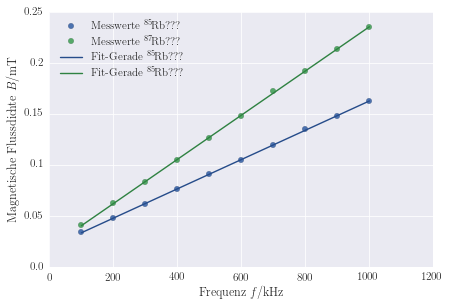

In [114]:
F = np.linspace(100,1000,1e06)
fig, ax = plt.subplots()
ax.set_xlim(0,1200)
ax.set_xlabel(axis_label("Frequenz",sym="f",unit="kHz"))
ax.set_ylabel(axis_label("Magnetische Flussdichte",sym="B",unit="mT"))
axis_scale(1e03,axis="y")
line_P1 = ax.plot(resonance_positions["Frequenz kHz"], resonance_positions["Magnetfeld P1"],
         label="Messwerte ${}^{85}\!$Rb???", marker="o",linestyle="")
line_P2 = ax.plot(resonance_positions["Frequenz kHz"], resonance_positions["Magnetfeld P2"],
         label="Messwerte ${}^{87}\!$Rb???", marker="o",linestyle="")

ax.plot(F,linear_fct(F,noms(fit_parameter_P1[0]),noms(fit_parameter_P1[1])),
        label="Fit-Gerade ${}^{85}\!$Rb???",color=lighten_color(line_P1[0].get_color(),-0.15))
ax.plot(F,linear_fct(F,noms(fit_parameter_P2[0]),noms(fit_parameter_P2[1])),
        label="Fit-Gerade ${}^{85}\!$Rb???",color=lighten_color(line_P2[0].get_color(),-0.15))
ax.legend(loc="upper left")
fig.tight_layout()
fig.savefig(path_graphics+"Resonanzstellen.pdf")

In [77]:
line_0[0].get_color()

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)